In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from scipy.stats import beta, binom
import itertools
from ipywidgets import interact, interactive


import hashlib
%matplotlib inline

sns.set(style="dark")
plt.style.use("ggplot")

import pymc3 as pm
import arviz as az

In [3]:
happy = pd.read_csv('World Happiness Report.csv')
life = pd.read_csv('Life Expectancy Data.csv')

In [4]:
happy = happy.rename(columns={"Country Name": "Country"})

In [5]:
merged = life.merge(happy, how = 'inner', on = ['Country', 'Year'])

In [6]:
columns = ['Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling',
       'Life Ladder', 'Log GDP Per Capita', 'Social Support',
       'Healthy Life Expectancy At Birth', 'Freedom To Make Life Choices',
       'Generosity', 'Perceptions Of Corruption', 'Positive Affect',
       'Negative Affect', 'Confidence In National Government']

In [7]:
merged = merged.dropna()

In [8]:
Status_Indicator = merged.Status.map(dict(Developing=0, Developed=1))

In [9]:
merged['Status Indicator'] = Status_Indicator

In [10]:
merged.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Log GDP Per Capita,Social Support,Healthy Life Expectancy At Birth,Freedom To Make Life Choices,Generosity,Perceptions Of Corruption,Positive Affect,Negative Affect,Confidence In National Government,Status Indicator
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,7.653833,0.528597,52.599998,0.388928,0.081652,0.880638,0.491410,0.339276,0.260557,0
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,7.670638,0.525568,52.299999,0.508514,0.105755,0.871242,0.491641,0.374861,0.409048,0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,7.680333,0.483552,52.000000,0.577955,0.062666,0.823204,0.547417,0.273328,0.482847,0
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,7.660506,0.520637,51.700001,0.530935,0.237588,0.775620,0.613513,0.267919,0.435440,0
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,7.581259,0.521104,51.400002,0.495901,0.163571,0.731109,0.479835,0.267175,0.307386,0


In [11]:
grouped = merged.groupby(['Country']).mean()
grouped.head()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,...,Log GDP Per Capita,Social Support,Healthy Life Expectancy At Birth,Freedom To Make Life Choices,Generosity,Perceptions Of Corruption,Positive Affect,Negative Affect,Confidence In National Government,Status Indicator
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,2011.500000,59.875000,274.500000,70.375000,0.012500,58.202410,64.875000,1790.625000,17.400000,95.750000,...,7.589941,0.515188,51.550000,0.562421,0.141376,0.815038,0.504555,0.286646,0.427282,0.0
Albania,2012.200000,77.060000,52.200000,0.200000,4.918000,333.858237,98.600000,6.200000,55.840000,0.800000,...,9.305332,0.726059,68.216002,0.640089,-0.083702,0.870555,0.547012,0.308215,0.401887,0.0
Argentina,2010.000000,75.588889,98.888889,9.444444,8.163333,1061.475672,81.777778,2.888889,53.811111,10.666667,...,10.044856,0.906328,66.300001,0.719619,-0.147993,0.842842,0.754868,0.263281,0.411542,0.0
Armenia,2010.000000,73.744444,104.444444,1.000000,3.981111,203.076666,90.777778,18.111111,41.422222,1.000000,...,9.177718,0.703882,64.800000,0.496155,-0.217615,0.878101,0.466998,0.431185,0.335829,0.0
Australia,2010.714286,82.000000,55.285714,1.000000,10.250000,9071.594024,92.142857,147.571429,64.328571,1.142857,...,10.728655,0.947152,70.257142,0.924931,0.310600,0.419014,0.745028,0.212288,0.521874,1.0


In [20]:
life.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [13]:
grouped.columns

Index(['Year', 'Life expectancy ', 'Adult Mortality', 'infant deaths',
       'Alcohol', 'percentage expenditure', 'Hepatitis B', 'Measles ', ' BMI ',
       'under-five deaths ', 'Polio', 'Total expenditure', 'Diphtheria ',
       ' HIV/AIDS', 'GDP', 'Population', ' thinness  1-19 years',
       ' thinness 5-9 years', 'Income composition of resources', 'Schooling',
       'Life Ladder', 'Log GDP Per Capita', 'Social Support',
       'Healthy Life Expectancy At Birth', 'Freedom To Make Life Choices',
       'Generosity', 'Perceptions Of Corruption', 'Positive Affect',
       'Negative Affect', 'Confidence In National Government',
       'Status Indicator'],
      dtype='object')

In [14]:
grouped.mean()

Year                                 2.010646e+03
Life expectancy                      7.009000e+01
Adult Mortality                      1.583724e+02
infant deaths                        3.773170e+01
Alcohol                              4.726366e+00
percentage expenditure               9.270263e+02
Hepatitis B                          8.020482e+01
Measles                              1.495915e+03
 BMI                                 3.818169e+01
under-five deaths                    5.226046e+01
Polio                                8.378040e+01
Total expenditure                    6.318354e+00
Diphtheria                           8.534371e+01
 HIV/AIDS                            1.446300e+00
GDP                                  7.357983e+03
Population                           1.726651e+07
 thinness  1-19 years                4.731854e+00
 thinness 5-9 years                  4.779330e+00
Income composition of resources      6.605828e-01
Schooling                            1.250156e+01


In [15]:
def betaParams(mean, std):
    var = std ** 2
    
    alpha = ((1 - mu)/var - (1 / mu)) * (mu ** 2)
    beta = alpha * (1 / mu - 1)
    
    return alpha

In [27]:
grouped.describe()['Confidence In National Government']

count    102.000000
mean       0.486301
std        0.174530
min        0.183123
25%        0.358967
50%        0.449963
75%        0.604747
max        0.935673
Name: Confidence In National Government, dtype: float64

In [28]:
pi = sum(grouped['Status Indicator']) / len(grouped)
sigma = 0.4    # this is a placeholder
mu_gdp = 9.075154
sigma_gdp = 1.165183
mu_a_mort = 1.583724e+02
mu_expectancy = 7.009000e+01
mu_infant = 3.773170e+01
mu_expend = 9.270263e+02
bmi_lower = 0
bmi_upper = 70
mu_pop = 1.726651e+07
mu_icr = 0.660583
sigma_icr = 0.165132
mu_sch = 12.501560
sigma_sch = 2.936952
mu_ss = 0.788118
sigma_ss = 0.128020
mu_choice = 0.705726
sigma_choice = 0.135607
mu_gen = 0.002737
sigma_gen = 0.163503
mu_corr = 0.782561
sigma_corr = 0.141009
mu_conf = 0.486301
sigma_conf = 0.174530

In [30]:
with pm.Model() as develop_prediction:
    
    # is country i developed or not?
    y = pm.Bernoulli('status', p = pi)
    
    #features we're training on
    nor = pm.Normal('gdp', mu = mu_gdp, sigma = sigma_gdp, shape = 2)    # gdp per capita
    poi = pm.Poisson('adult mortality', mu = mu_a_mort, shape = 2)    # adult mortality
    poi_2 = pm.Poisson('life expectancy', mu = mu_expectancy, shape = 2)    # life expectancy
    poi_3 = pm.Poisson('infant deaths', mu = mu_infant, shape = 2)    # infant deaths
    exp = pm.Exponential('percentage expenditure', lam = mu_expend, shape = 2)    # percentage expenditure
    uni = pm.Uniform('bmi', lower = bmi_lower, upper = bmi_upper, shape = 2)    # bmi
    poi_4 = pm.Poisson('population', mu = mu_pop, shape = 2)    # population
    bet = pm.Beta('income composition of resources', mu = mu_icr, sigma = sigma_icr, shape = 2)    # income comp of resources
    gam = pm.Gamma('schooling', mu = mu_sch, sigma = sigma_sch, shape = 2)    # schooling
    uni_2 = pm.Uniform('life ladder', lower = 0, upper = 10, shape = 2)    # life ladder
    bet_2 = pm.Beta('social support', mu = mu_ss, sigma = sigma_ss, shape = 2)    # social support
    bet_3 = pm.Beta('freedom to make life choices', mu = mu_choice, sigma = sigma_choice, shape = 2)    # freedom to make life choices
    nor_2 = pm.Normal('generosity', mu = mu_gen, sigma = sigma_gen, shape = 2)    # generosity
    bet_4 = pm.Beta('perceptions of corruption', mu = mu_corr, sigma = sigma_corr, shape = 2)    # perceptions of corruption
    bet_5 = pm.Beta('confidence in national government', mu = mu_conf, sigma = sigma_conf, shape = 2)    # confidence in national government
    
    
    # fancy indexing
    gdp_mean = nor[y]
    mort_mean = poi[y]
    expectancy = poi_2[y]
    infant = poi_3[y]
    expend = exp[y]
    bmi = uni[y]
    pop = poi_4[y]
    icr = bet[y]
    sch = gam[y]
    ladd = uni_2[y]
    soc = bet_2[y]
    free = bet_3[y]
    gen = nor_2[y]
    corr = bet_4[y]
    conf = bet_5[y]
    
    # putting the model together
    x = pm.Normal('x', mu = ((gdp_mean * 0.066) + (mort_mean * 0.066) + (expectancy * 0.066) + (infant * 0.066) + (expend * 0.066) + (bmi * 0.066) + (pop * 0.066) +
                            (icr * 0.066) + (sch * 0.066) + (ladd * 0.066) + (soc * 0.066) + (free * 0.066) + (gen * 0.066) + (corr * 0.066) + (conf * 0.066)),
                  sigma = sigma, 
                  observed = [merged['Log GDP Per Capita'], merged['Adult Mortality'], merged['Life expectancy '], merged['infant deaths']])
    
    trace = pm.sample(2000, chains = 4, tune = 1000, return_inferencedata = True)
    
    # posterior predictive check
    ppc = pm.sample_posterior_predictive(trace, samples=500, model=develop_prediction, size=100) 

Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>BinaryGibbsMetropolis: [status]
>NUTS: [confidence in national government, perceptions of corruption, generosity, freedom to make life choices, social support, life ladder, schooling, income composition of resources, bmi, percentage expenditure, gdp]
>CompoundStep
>>Metropolis: [population]
>>Metropolis: [infant deaths]
>>Metropolis: [life expectancy]
>>Metropolis: [adult mortality]


/opt/conda/lib/python3.9/site-packages/pymc3/step_methods/metropolis.py:226: RuntimeWarning: overflow encountered in exp
  "accept": np.exp(accept),
/opt/conda/lib/python3.9/site-packages/pymc3/step_methods/metropolis.py:226: RuntimeWarning: overflow encountered in exp
  "accept": np.exp(accept),
/opt/conda/lib/python3.9/site-packages/pymc3/step_methods/metropolis.py:226: RuntimeWarning: overflow encountered in exp
  "accept": np.exp(accept),
/opt/conda/lib/python3.9/site-packages/pymc3/step_methods/metropolis.py:226: RuntimeWarning: overflow encountered in exp
  "accept": np.exp(accept),
/opt/conda/lib/python3.9/site-packages/pymc3/step_methods/hmc/quadpotential.py:224: RuntimeWarning: divide by zero encountered in true_divide
  np.divide(1, self._stds, out=self._inv_stds)
/opt/conda/lib/python3.9/site-packages/pymc3/step_methods/hmc/quadpotential.py:203: RuntimeWarning: invalid value encountered in multiply
  return np.multiply(self._var, x, out=out)
/opt/conda/lib/python3.9/site-pac

RuntimeError: Chain 1 failed.

In [17]:
trace.posterior

<xarray.Dataset>
Dimensions:                       (chain: 4, draw: 2000, gdp_dim_0: 2, adult mortality_dim_0: 2, life expectancy_dim_0: 2, infant deaths_dim_0: 2, percentage expenditure_dim_0: 2)
Coordinates:
  * chain                         (chain) int64 0 1 2 3
  * draw                          (draw) int64 0 1 2 3 4 ... 1996 1997 1998 1999
  * gdp_dim_0                     (gdp_dim_0) int64 0 1
  * adult mortality_dim_0         (adult mortality_dim_0) int64 0 1
  * life expectancy_dim_0         (life expectancy_dim_0) int64 0 1
  * infant deaths_dim_0           (infant deaths_dim_0) int64 0 1
  * percentage expenditure_dim_0  (percentage expenditure_dim_0) int64 0 1
Data variables:
    status                        (chain, draw) int64 0 0 0 0 0 0 ... 0 0 0 0 0
    gdp                           (chain, draw, gdp_dim_0) float64 9.682 ... ...
    adult mortality               (chain, draw, adult mortality_dim_0) int64 ...
    life expectancy               (chain, draw, life expectancy_dim_0) int64 ...
    infant deaths                 (chain, draw, infant deaths_dim_0) int64 29...
    percentage expenditure        (chain, draw, percentage expenditure_dim_0) float64 ...
Attributes:
    created_at:                 2023-05-06T20:48:12.469173
    arviz_version:              0.12.1
    inference_library:          pymc3
    inference_library_version:  3.11.2
    sampling_time:              9.982709884643555
    tuning_steps:               1000

In [18]:
az.summary(trace)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
status,0.013,0.112,0.000,0.000,0.007,0.005,255.0,255.0,1.01
gdp[0],8.948,0.434,8.647,9.728,0.216,0.166,7.0,27.0,1.53
gdp[1],9.071,1.180,6.751,11.213,0.017,0.012,5017.0,2761.0,1.00
adult mortality[0],157.857,1.972,155.000,161.000,0.974,0.745,4.0,8.0,4.53
adult mortality[1],159.974,12.290,142.000,185.000,5.122,3.830,6.0,16.0,1.83
life expectancy[0],66.907,2.406,63.000,70.000,1.190,0.910,4.0,4.0,4.70
life expectancy[1],70.086,7.651,50.000,81.000,2.122,1.563,13.0,21.0,1.30
infant deaths[0],37.580,6.115,25.000,48.000,0.185,0.131,1087.0,1393.0,1.01
infant deaths[1],37.784,5.991,26.000,48.000,0.181,0.129,1103.0,1395.0,1.00
percentage expenditure[0],0.001,0.001,0.000,0.003,0.000,0.000,5012.0,3039.0,1.00


(array([7899.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
         101.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

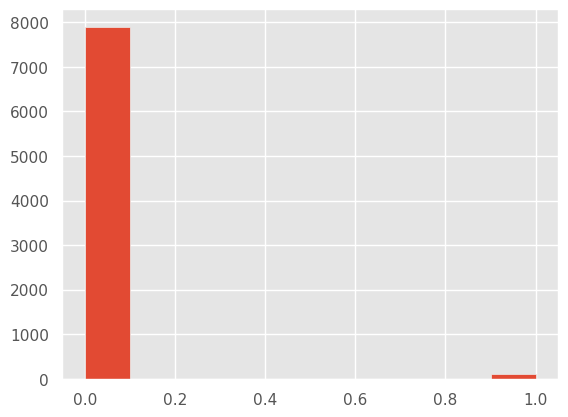

In [20]:
plt.hist(trace.posterior['status'].values.flatten())

In [ ]:
az.summary(ppc)

/opt/conda/lib/python3.9/site-packages/arviz/data/base.py:220: UserWarning: More chains (500) than draws (100). Passed array should have shape (chains, draws, *shape)
  warnings.warn(


In [20]:
import seaborn as sns

def plot_hist(sample, **options):
    """Plot a histogram of goals.
    
    sample: sequence of values
    """
    sns.histplot(sample, stat='probability', discrete=True,
                 alpha=0.5)

In [21]:
with develop_prediction:
    post_pred = pm.sample_posterior_predictive(trace)

In [22]:
sample_post_pred = post_pred['x']
sample_post_pred.mean()

9.233313476472317

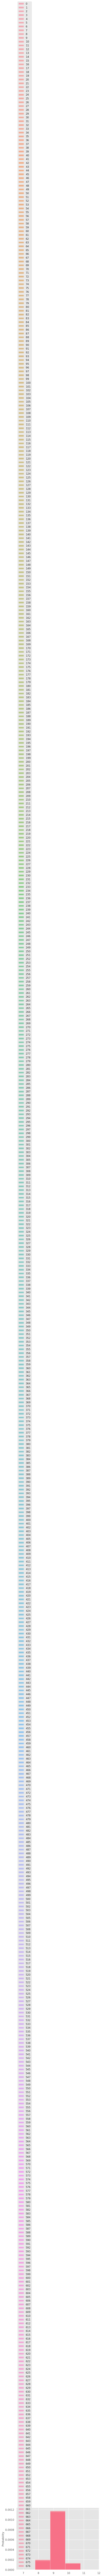

In [23]:
plot_hist(sample_post_pred, label='posterior pred')